<a href="https://colab.research.google.com/github/kushal8112/Crop_yield_prediction/blob/main/CropYieldPrediction%5BOrg%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install ucimlrepo
!pip install opendatasets

In [ ]:
import pandas as pd
import opendatasets as od
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Importing IoT Agribot Dataset from Kaggle

In [ ]:
#od.download("https://www.kaggle.com/code/nirmalgaud/crop-recommendation-system-using-machine-learning/input")
#df_crop_recommendation = pd.read_csv("Crop_recommendation.csv")
df_crop_recommendation = pd.read_csv("/content/Plant_Parameters.csv", index_col=False)
df_crop_recommendation = df_crop_recommendation.sample(5000, random_state=42)
X_crop = df_crop_recommendation.iloc[:,:-1]
y_crop_before_encoding = df_crop_recommendation['Plant Type']

In [ ]:
df_crop_recommendation

,pH,Soil EC,Phosphorus,Potassium,Urea,T.S.P,M.O.P,Moisture,Temperature,Plant Type
75721,7.361329,0.796180,37.441842,112.460069,42.795146,22.939867,38.487760,66.210275,83.988838,Sunflowers
80184,6.194531,1.739422,19.263714,166.555234,72.007033,39.088877,48.921724,72.442318,82.012911,Tomato
19864,6.413047,1.021087,37.888139,171.908302,84.038296,18.646006,36.902177,68.213341,78.745725,Chili
76699,6.292773,0.722326,30.001615,138.692279,65.431830,24.175181,34.237954,68.838909,83.797512,Sunflowers
92991,7.410701,0.570063,15.053066,180.492397,31.588940,17.247717,31.130203,54.919011,64.265583,Wheat
...,...,...,...,...,...,...,...,...,...,...
44719,6.428005,1.010363,28.156882,124.089148,53.277814,23.664775,27.229341,68.228090,71.586957,Eggplant
20980,6.108827,0.513176,12.822764,58.787179,33.100414,14.735800,24.994453,64.928799,75.096390,Cinnamon
57224,6.268602,0.248982,33.477415,172.246840,44.670525,29.096124,25.416772,87.833098,81.334921,Rice
23910,5.768903,0.673705,8.215024,43.052298,30.998984,17.699356,24.194153,65.774413,83.191124,Cinnamon


In [ ]:
X_crop

,pH,Soil EC,Phosphorus,Potassium,Urea,T.S.P,M.O.P,Moisture,Temperature
75721,7.361329,0.796180,37.441842,112.460069,42.795146,22.939867,38.487760,66.210275,83.988838
80184,6.194531,1.739422,19.263714,166.555234,72.007033,39.088877,48.921724,72.442318,82.012911
19864,6.413047,1.021087,37.888139,171.908302,84.038296,18.646006,36.902177,68.213341,78.745725
76699,6.292773,0.722326,30.001615,138.692279,65.431830,24.175181,34.237954,68.838909,83.797512
92991,7.410701,0.570063,15.053066,180.492397,31.588940,17.247717,31.130203,54.919011,64.265583
...,...,...,...,...,...,...,...,...,...
44719,6.428005,1.010363,28.156882,124.089148,53.277814,23.664775,27.229341,68.228090,71.586957
20980,6.108827,0.513176,12.822764,58.787179,33.100414,14.735800,24.994453,64.928799,75.096390
57224,6.268602,0.248982,33.477415,172.246840,44.670525,29.096124,25.416772,87.833098,81.334921
23910,5.768903,0.673705,8.215024,43.052298,30.998984,17.699356,24.194153,65.774413,83.191124


In [ ]:
df_crop_recommendation = df_crop_recommendation.dropna()

For IoT Agribot dataset

In [ ]:
fig_crop = px.scatter_matrix(X_crop)
fig_crop.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.regularizers import l1_l2, l1, l2
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Label encoding the multi-class variable (target variable)


In [ ]:
crop_labels = list(y_crop_before_encoding.unique())
y_crop = []
for i in y_crop_before_encoding:
  encode = []
  encode = [0]*len(crop_labels)
  encode[crop_labels.index(i)] = 1
  y_crop.append(encode)
y_crop = pd.DataFrame(y_crop)
y_crop.tail()

,0,1,2,3,4,5,6,7,8,9
4995,0,0,0,0,0,0,0,1,0,0
4996,0,0,0,0,0,0,1,0,0,0
4997,0,0,0,0,0,1,0,0,0,0
4998,0,0,0,0,0,0,1,0,0,0
4999,0,0,0,0,0,0,0,1,0,0


### Plotting correlation matrix and calculating the variance inflation factor to check multicollinearity

       feature      V.I.F
0           pH  92.928490
1      Soil EC   6.555099
2   Phosphorus  16.004386
3    Potassium  16.276120
4         Urea  13.933076
5        T.S.P  15.956795
6        M.O.P  27.519897
7     Moisture  61.937951
8  Temperature  82.626079


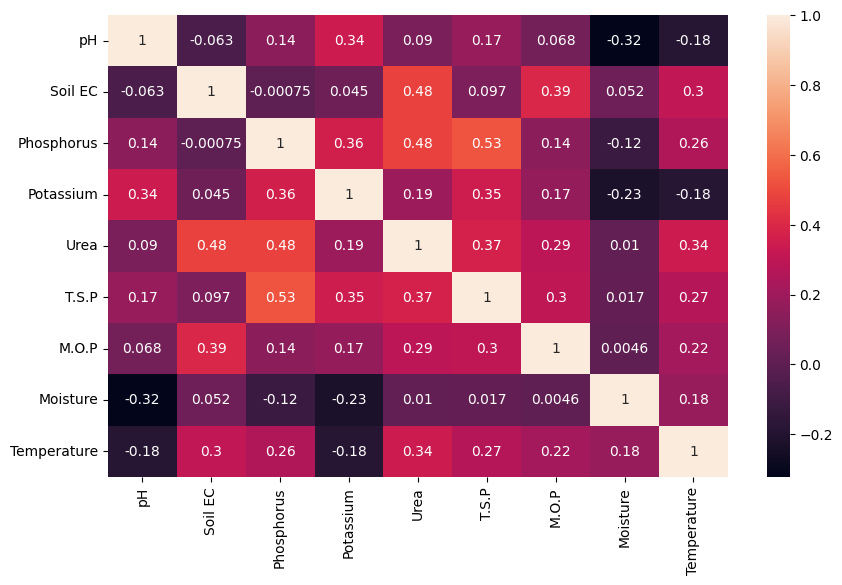

In [ ]:
crop_corr=X_crop.corr()
plt.figure(figsize=(10,6))
sn.heatmap(crop_corr,annot=True)

vif_data_crop = pd.DataFrame()
vif_data_crop["feature"] = X_crop.columns
vif_data_crop['V.I.F'] = [variance_inflation_factor(X_crop.values,i) for i in range(len(X_crop.columns))]
print(vif_data_crop)

### Applying principle component analysis to tackle multicollinearity

In [ ]:
X_crop1 = X_crop.copy()
X_crop = PCA().fit_transform(X_crop)

In [ ]:
X_crop

array([[-3.33812969e+01, -1.95694322e-01,  1.67128714e+01, ...,
        -1.15846372e+01,  1.08840492e+00,  5.12496892e-01],
       [ 2.30192084e+01, -2.04276967e+01,  1.04342168e+01, ...,
         4.48496257e+00, -3.14466029e-01,  3.59610326e-01],
       [ 2.96907832e+01, -3.00212124e+01, -1.20227566e+00, ...,
        -1.19248531e+01,  9.50778338e-02,  3.54655316e-02],
       ...,
       [ 2.48529272e+01,  6.32479043e+00,  1.88401899e+01, ...,
        -2.37876247e+00,  2.73755118e-01, -1.46404226e-01],
       [-1.06057992e+02,  1.01162255e+01,  3.35651756e+00, ...,
         7.28451327e+00, -2.55888566e-01, -7.52528444e-02],
       [-3.27546214e+01, -3.85075792e+01, -3.05247175e+00, ...,
        -2.50693081e+00, -1.22925002e-02,  1.57721239e-01]])

In [ ]:
X_crop_train, X_crop_test, y_crop_train, y_crop_test = train_test_split(X_crop, y_crop, test_size=0.3, random_state=42)

### Neural network for Crop recommendation system

In [ ]:
model_crop = Sequential()

model_crop.add(Dense(16,input_dim=X_crop_train.shape[1], activation='LeakyReLU'))
model_crop.add(Dense(64, activation='LeakyReLU'))
model_crop.add(Dense(32, activation='LeakyReLU'))
model_crop.add(Dense(len(crop_labels), activation='softmax'))

filepath = "/content/sample_data/best_model_crop"
checkpoint = ModelCheckpoint(filepath=filepath, moniter='accuracy', verbose=1, mode='max', save_best_model=True)

model_crop.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_crop.fit(X_crop_train, y_crop_train, epochs=40, batch_size=64, validation_split=0.2, callbacks=[checkpoint], shuffle=True)
print(history.history.keys())

Epoch 1/40
27/44 [=================>............] - ETA: 0s - loss: 3.0927 - accuracy: 0.2622     
Epoch 1: saving model to /content/sample_data/best_model_crop
44/44 [==============================] - 2s 23ms/step - loss: 2.3792 - accuracy: 0.3661 - val_loss: 1.0336 - val_accuracy: 0.6071
Epoch 2/40
26/44 [================>.............] - ETA: 0s - loss: 0.9200 - accuracy: 0.6550
Epoch 2: saving model to /content/sample_data/best_model_crop
44/44 [==============================] - 1s 19ms/step - loss: 0.8617 - accuracy: 0.6739 - val_loss: 0.7261 - val_accuracy: 0.7314
Epoch 3/40
27/44 [=================>............] - ETA: 0s - loss: 0.6997 - accuracy: 0.7222
Epoch 3: saving model to /content/sample_data/best_model_crop
44/44 [==============================] - 1s 19ms/step - loss: 0.6916 - accuracy: 0.7179 - val_loss: 0.6267 - val_accuracy: 0.7586
Epoch 4/40
28/44 [==================>...........] - ETA: 0s - loss: 0.6241 - accuracy: 0.7333
Epoch 4: saving model to /content/sample_da

In [ ]:
predictions_crop = np.array(model_crop.predict(X_crop_test))
y_crop_predictions = []
y_crop_test = np.array(y_crop_test)
actual_crop=[]
for i in range(len(predictions_crop)):
  y_crop_predictions.append(crop_labels[np.argmax(predictions_crop[i])])
  actual_crop.append(crop_labels[np.argmax(y_crop_test[i])])

47/47 [==============================] - 0s 2ms/step


### Evaulation (Crop recommendation)

In [ ]:
accuracy_crop = accuracy_score(actual_crop, y_crop_predictions)
classification_report_crop = classification_report(actual_crop, y_crop_predictions)
conf_matrix_crop = confusion_matrix(actual_crop, y_crop_predictions)
print("\n Accuracy:",round(accuracy_crop,4)*100,"%",
      "\n Classificcation Report: \n", classification_report_crop,
      "\n Confusion Matrix: \n",conf_matrix_crop)


 Accuracy: 84.13000000000001 % 
 Classificcation Report: 
               precision    recall  f1-score   support

     Carrots       0.99      0.85      0.92       161
       Chili       0.64      0.49      0.56       160
    Cinnamon       1.00      1.00      1.00       141
        Corn       0.75      0.68      0.71       167
    Eggplant       0.62      0.77      0.69       157
        Rice       0.99      0.99      0.99       143
Strawberries       0.85      0.99      0.92       137
  Sunflowers       0.70      0.73      0.71       150
      Tomato       0.95      1.00      0.98       142
       Wheat       0.99      0.99      0.99       142

    accuracy                           0.84      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.84      0.84      0.84      1500
 
 Confusion Matrix: 
 [[137   0   0   0   0   0  24   0   0   0]
 [  0  79   0   5  71   0   0   2   3   0]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   8   0 114   2   0   0 

In [ ]:
import requests
import pandas as pd
import io

In [ ]:
state_list = ["Andhra%20Pradesh","Arunachal%20Pradesh","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal%20Pradesh","Jammu%20%26%20Kashmir","Jharkhand","Karnataka","Kerala","Madhya%20Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil%20Nadu","Telangana","Tripura","Uttar%20Pradesh","Uttarakhand","West%20Bengal","Andaman%20%26%20Nicobar","Chandigarh","Dadra%20%26%20Nagar%20Haveli","Daman%20%26%20Diu","Lakshadweep","Delhi","Puducherry"]


### Importing Soil Moisture dataset based on SMAP NASA dataset from data.gov.in

In [ ]:
soil_moisture_data = pd.DataFrame()
for i in state_list:
  url = "https://api.data.gov.in/resource/2236699a-d935-4f37-bd98-288bc87d0e20?api-key=579b464db66ec23bdd000001efa77350c42c4c1b5485f2c48091afe8&format=csv&offset=0&limit=999&filters%5B_state_%5D="+i
  url_data = requests.get(url).content
  rawData = pd.read_csv(io.StringIO(url_data.decode('utf-8')))
  soil_moisture_data = pd.concat([soil_moisture_data,rawData], axis=0)
soil_moisture_data

,"""State""",District,Date,Year,Month,Avg_smlvl_at15cm,Agency_name
0,Andhra Pradesh,Anantapur,2023-12-01T05:44:02Z,2023,12,18.175900,NRSC VIC MODEL
1,Andhra Pradesh,Anantapur,2023-12-02T05:44:02Z,2023,12,18.373541,NRSC VIC MODEL
2,Andhra Pradesh,Chittoor,2023-12-01T05:44:02Z,2023,12,26.934883,NRSC VIC MODEL
3,Andhra Pradesh,Chittoor,2023-12-02T05:44:02Z,2023,12,27.929772,NRSC VIC MODEL
4,Andhra Pradesh,East Godavari,2023-12-01T05:44:02Z,2023,12,17.812635,NRSC VIC MODEL
...,...,...,...,...,...,...,...
3,Puducherry,Mahe,2023-12-02T05:44:06Z,2023,12,2.309332,NRSC VIC MODEL
4,Puducherry,Pondicherry,2023-12-01T05:44:06Z,2023,12,13.639092,NRSC VIC MODEL
5,Puducherry,Pondicherry,2023-12-02T05:44:06Z,2023,12,13.906801,NRSC VIC MODEL
6,Puducherry,Yanam,2023-12-01T05:44:06Z,2023,12,4.037675,NRSC VIC MODEL


In [ ]:
soil_moisture_data1 = soil_moisture_data.copy()
min_moisture = min(soil_moisture_data1['Avg_smlvl_at15cm'])
std_moisture = soil_moisture_data1['Avg_smlvl_at15cm'].std()
soil_moisture_data1['Avg_smlvl_at15cm'] = (soil_moisture_data1['Avg_smlvl_at15cm'] - min_moisture)/std_moisture
soil_moisture_data1

,"""State""",District,Date,Year,Month,Avg_smlvl_at15cm,Agency_name
0,Andhra Pradesh,Anantapur,2023-12-01T05:44:02Z,2023,12,2.959658,NRSC VIC MODEL
1,Andhra Pradesh,Anantapur,2023-12-02T05:44:02Z,2023,12,2.993128,NRSC VIC MODEL
2,Andhra Pradesh,Chittoor,2023-12-01T05:44:02Z,2023,12,4.442967,NRSC VIC MODEL
3,Andhra Pradesh,Chittoor,2023-12-02T05:44:02Z,2023,12,4.611448,NRSC VIC MODEL
4,Andhra Pradesh,East Godavari,2023-12-01T05:44:02Z,2023,12,2.898140,NRSC VIC MODEL
...,...,...,...,...,...,...,...
3,Puducherry,Mahe,2023-12-02T05:44:06Z,2023,12,0.272700,NRSC VIC MODEL
4,Puducherry,Pondicherry,2023-12-01T05:44:06Z,2023,12,2.191363,NRSC VIC MODEL
5,Puducherry,Pondicherry,2023-12-02T05:44:06Z,2023,12,2.236698,NRSC VIC MODEL
6,Puducherry,Yanam,2023-12-01T05:44:06Z,2023,12,0.565390,NRSC VIC MODEL


In [ ]:
X_crop1.describe()
min_x_crop = min(X_crop1['Moisture'])
std_x_moisture = X_crop1['Moisture'].std()
X_crop1['Moisture'] = (X_crop1['Moisture'] - min_x_crop)/std_x_moisture
X_crop1

,pH,Soil EC,Phosphorus,Potassium,Urea,T.S.P,M.O.P,Moisture,Temperature
75721,7.361329,0.796180,37.441842,112.460069,42.795146,22.939867,38.487760,2.065123,83.988838
80184,6.194531,1.739422,19.263714,166.555234,72.007033,39.088877,48.921724,2.860601,82.012911
19864,6.413047,1.021087,37.888139,171.908302,84.038296,18.646006,36.902177,2.320801,78.745725
76699,6.292773,0.722326,30.001615,138.692279,65.431830,24.175181,34.237954,2.400651,83.797512
92991,7.410701,0.570063,15.053066,180.492397,31.588940,17.247717,31.130203,0.623871,64.265583
...,...,...,...,...,...,...,...,...,...
44719,6.428005,1.010363,28.156882,124.089148,53.277814,23.664775,27.229341,2.322684,71.586957
20980,6.108827,0.513176,12.822764,58.787179,33.100414,14.735800,24.994453,1.901552,75.096390
57224,6.268602,0.248982,33.477415,172.246840,44.670525,29.096124,25.416772,4.825129,81.334921
23910,5.768903,0.673705,8.215024,43.052298,30.998984,17.699356,24.194153,2.009489,83.191124


In [ ]:
crop_production = pd.read_csv('/content/crop_production.csv')
plant_categories = ['Cardamon','Dry chillies','Carrot','Rice','Wheat','Tomato','Brinjal','Sunflower','Maize','Other Fresh Fruits']
filtered_data = crop_production[crop_production['Crop'].isin(plant_categories)]
filtered_data = filtered_data[filtered_data['Crop_Year'] == 2014]
filtered_data['Crop'].replace({'Cardamon':'Cinnamon','Dry chillies':'Chili','Carrot':'Carrots','Brinjal':'Eggplant','Sunflowers':'Sunflower','Maize':'Corn','Other Fresh Fruits':'Strawberries'},inplace=True)
filtered_data['State_Name'].replace({'Dadra and Nagar Haveli':'Dadra & Nagar Haveli','Jammu and Kashmir ':'Jammu & Kashmir','Telangana ':'Telangana'}, inplace=True)
filtered_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
929,Andhra Pradesh,ANANTAPUR,2014,Kharif,Eggplant,320.0,7596.0
936,Andhra Pradesh,ANANTAPUR,2014,Kharif,Chili,2799.0,11848.0
942,Andhra Pradesh,ANANTAPUR,2014,Kharif,Corn,16839.0,42687.0
953,Andhra Pradesh,ANANTAPUR,2014,Kharif,Rice,22658.0,68155.0
958,Andhra Pradesh,ANANTAPUR,2014,Kharif,Sunflower,5066.0,1180.0
...,...,...,...,...,...,...,...
246069,West Bengal,PURULIA,2014,Kharif,Sunflower,46.0,42.0
246084,West Bengal,PURULIA,2014,Rabi,Wheat,1622.0,3663.0
246085,West Bengal,PURULIA,2014,Summer,Corn,325.0,2039.0
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0


In [ ]:
state_soil_list = list(soil_moisture_data1['"State"'].unique())
filtered_soil_list = list(filtered_data['State_Name'].unique())
empty_list = []
for i in filtered_soil_list:
  empty_list.append(soil_moisture_data1[soil_moisture_data1['"State"'] == i])
soil_moisture_data2 = pd.concat(empty_list)

### Incorporating the soil moisture dataset with crop prediction model for broad applicability.

In [ ]:
#model testing
hjk=46
for j in range(hjk,hjk+1):
  input_crop = np.array(X_crop[j:j+1])
  b = np.array(y_crop[j:j+1])
  a = model_crop.predict(input_crop)
  crop_predicted = crop_labels[np.argmax(a)]
  actual_predicted = crop_labels[np.argmax(b)]
  print(crop_predicted, actual_predicted)
  if crop_predicted==actual_predicted:
    test = np.array(soil_moisture_data2['Avg_smlvl_at15cm'])
    predict = float(X_crop1['Moisture'][j:j+1])
    error = np.array(test-predict)
    error = error**2
    i = int(np.where(error==min(error))[0])
    s = np.array(soil_moisture_data2.iloc[i])
    state = str(s[0])
    district = str(s[1])
    district= district.upper()
    print(state)
    filter = filtered_data[filtered_data['State_Name']==state]
    filter = filter[filter['Crop']==str(crop_predicted)]
    filter1 = filter[filter['District_Name']==district]
  else:
    print("Somethings wrong")

1/1 [==============================] - 0s 30ms/step
Rice Rice
Assam


<ipython-input-70-11befc535134>:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [ ]:
print("The soil properties collected by the IoT include: \n",
    "\n pH:",df_crop_recommendation['pH'].iloc[j],
    "\n Soil EC:",df_crop_recommendation['Soil EC'].iloc[j],
    "\n Phosphorus:",df_crop_recommendation['Phosphorus'].iloc[j],
    "\n Potassium:",df_crop_recommendation['Potassium'].iloc[j],
    "\n Urea:",df_crop_recommendation['Urea'].iloc[j],
    "\n T.S.P:",df_crop_recommendation['T.S.P'].iloc[j],
    "\n M.O.P:",df_crop_recommendation['M.O.P'].iloc[j],
    "\n Moisture:",df_crop_recommendation['Moisture'].iloc[j],
    "\n Temperature:",df_crop_recommendation['Temperature'].iloc[j],
    "\n","\n For these properties, the crop recommended by the model is:",crop_predicted,
    "\n","\n Also, using the data from gov.in based on SMAP NASA data and based on the soil moisture content, \n for predicted crop \""+crop_predicted+"\" the suitable region is:",
    "\n State:",filter['State_Name'].iloc[0],
    "\n District:",list(filter1['District_Name'])[0],
    "\n Season:",filter['Season'].unique(),
    "\n Area:",list(filter1['Area']),
    "\n Yield:",list(filter1['Production']),
    "\n","\n If the information is emtpy, it shows that there are no records in the database/dataset which match the state, district and crop type.\n This can be improved by collecting more data from the sources.")

The soil properties collected by the IoT include: 
 
 pH: 6.482485914894548 
 Soil EC: 0.3030823988556115 
 Phosphorus: 20.2769310805369 
 Potassium: 155.46678754627527 
 Urea: 33.68387773879211 
 T.S.P: 21.9862587623043 
 M.O.P: 23.265690370775253 
 Moisture: 75.44723136509701 
 Temperature: 83.38392191478881 
 
 For these properties, the crop recommended by the model is: Rice 
 
 Also, using the data from gov.in based on SMAP NASA data and based on the soil moisture content, 
 for predicted crop "Rice" the suitable region is: 
 State: Assam 
 District: DIMA HASAO 
 Season: ['Autumn     ' 'Summer     ' 'Winter     '] 
 Area: [5607.0, 9093.0] 
 Yield: [10300.0, 24211.0] 
 
 If the information is emtpy, it shows that there are no records in the database/dataset which match the state, district and crop type.
 This can be improved by collecting more data from the sources.
